Случайная величина имеет экспоненциальный закон распределения 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

[0.7, 0.19, 0.55, 0.17, 0.07, 1.72, 1.23, 2.52, 0.31, 0.2, 1.11, 3.4, 0.27, 1.06, 1.29, 0.29, 0.28, 2.01, 0.5, 0.97, 0.96, 0.24, 1.28, 1.76, 0.06]


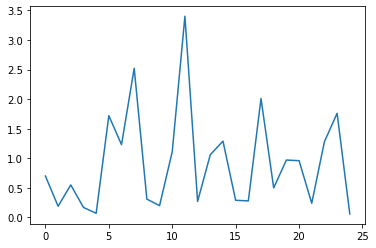

In [ ]:
#генерация выборки 
xn = []
n = 25
for i in range(n):
  xn.append(round(np.random.exponential(1), 2)) #генерируем выборку объема 25
print(xn)  
plt.plot(xn) 
plt.show()  

In [ ]:
#построение вариационного ряда
xn_ = np.sort(xn) 
print("вариационный ряд:", xn_)

вариационный ряд: [0.06 0.07 0.17 0.19 0.2  0.24 0.27 0.28 0.29 0.31 0.5  0.55 0.7  0.96
 0.97 1.06 1.11 1.23 1.28 1.29 1.72 1.76 2.01 2.52 3.4 ]


In [ ]:
#мода определена только для дискретного ряда
median = xn_[12]
print("медиана:", median)
scope = xn_[n - 1] - xn_[0]
print("размах:", scope)
#нахождение оценок первого момента, второго и третьего центральных моментов, а также нахождение оценки коэффициента ассиметрии
𝛼1 = np.mean(xn)
𝜇2 = 0
𝜇3 = 0
for xi in xn:
  𝜇2 += ((xi - 𝛼1) ** 2) / n
  𝜇3 += ((xi - 𝛼1) ** 3) / n
𝛾 = 𝜇3 / ((𝜇2) ** (3/2))
print("оценка первого момента(мат. ожидания):", 𝛼1)
print("оценка коэффициента ассиметрии:", 𝛾)
#нахождение теоритических значений моментов и коэффициента ассиметрии в pdf на странице 4
print("первый момент: 1")
print("коэффициент ассиметрии: 2")

медиана: 0.7
размах: 3.34
оценка первого момента(мат. ожидания): 0.9256
оценка коэффициента ассиметрии: 1.2442016054322127
первый момент: 1
коэффициент ассиметрии: 2


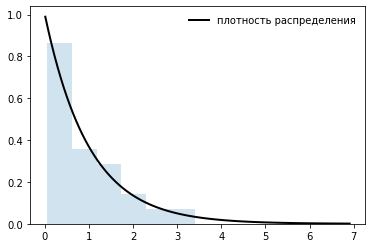

In [ ]:
#построение гистограммы и плотности распределения на одном графике
from scipy.stats import expon
rv = expon()
x_tmp = np.linspace(expon.ppf(0.01),
                expon.ppf(0.999), 100)
plt.plot(x_tmp, rv.pdf(x_tmp), 'k-', lw=2, label="плотность распределения") #построение плотности распределения экспоненциального распределения
plt.hist(xn, density=True, histtype='bar', alpha=0.2, bins='sturges') #построение гистограммы по нашей выборке, количество корзин k = 1 + log2(n) = 5,64 = 6
plt.legend(loc='best', frameon=False)
plt.show()

x(25%):  0.27
x(50%):  0.7
x(75%):  1.28
𝜀:  1.01
левая граница:  0.06
правая граница:  2.52
количество выбросов: 1 , значения: [3.4]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


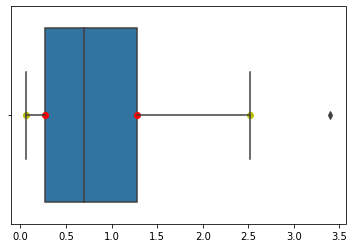

In [ ]:
#построение boxplot
import seaborn as sns
sns.boxplot(xn_)
x25 = xn_[int(np.floor((n-1)/4))] #находим квартили 
x75 = xn_[int(np.floor(3*(n-1)/4))] 
print("x(25%): ", x25)  
print("x(50%): ", median)
print("x(75%): ", x75)
𝜀 = x75 - x25 
print("𝜀: ", 𝜀)
left = max(x25 - 1.5*𝜀, xn_[0]) #левая граница - наименьшее значение выборки, превышающее x25 - 1.5*𝜀
right = min(x75 + 1.5*𝜀, xn_[n - 2]) #правая граница - наибольшее значение выборки, меньшее x75 + 1.5*𝜀
print("левая граница: ", left)
print("правая граница: ", right)
emissions = []
for xi_ in xn_:
  if xi_ < left or xi_ > right:
    emissions.append(xi_)
print("количество выбросов:", len(emissions), ", значения:", emissions)
plt.scatter(x25, 0, c = ['r'])
plt.scatter(x75, 0, c = ['r'])
plt.scatter(left, 0, c = ['y'])
plt.scatter(right, 0, c = ['y'])
plt.show()

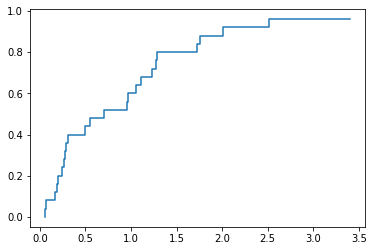

In [ ]:
#Построение эмпирической функции распределения
plt.step(xn_, np.linspace(0, 1, len(xn_), endpoint=False))
plt.show()

каждая парабола по отдельности


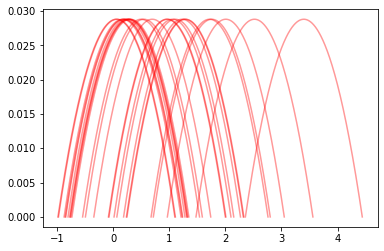

In [ ]:
#ядерная оценка плотности распределения
s = np.sqrt(n/(n-1)*𝜇2) #корень несмещенной оценки плотности распределения
h = 2.344 * s/(n**0.2)
kernels = []

for xi in xn_:
    x_ = np.linspace(xi - h, xi + h, 400)
    kernel = 0.75*(1-((x_ - xi)/h)**2)*(1/n/h)
    kernels.append(kernel)
    plt.plot(x_, kernel, color='r', alpha=0.4)

print("каждая парабола по отдельности")
plt.show()

сумма всех парабол


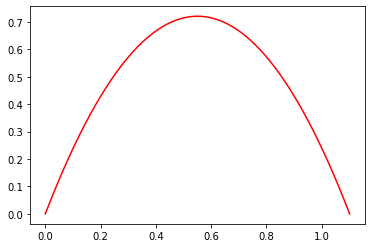

In [ ]:
#ядерная оценка плотности распределения
S = np.sum(kernels, axis=0)

plt.plot(np.linspace(0, xn[n - 1] + h, 400), S, c='r')
print("сумма всех парабол")
plt.show()

оценка первого момента: 0.9256
оценка второго момента: 1.5434080000000001
оценка дисперсии: 0.8286571305431458
Параметры закона нормального распределения среднего арифметического элементов выборки: мат. ожидание - 0.9256 , дисперсия - 0.027466905600000008


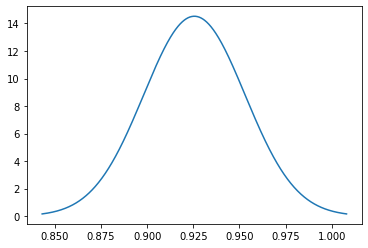

In [ ]:
#находим плотность распределения среднего арифметического элементов выборки(теория в pdf на странице 4)
𝛼2 = 0
for xi in xn:
  𝛼2 += (xi**2)/n
print("оценка первого момента:", 𝛼1)
print("оценка второго момента:", 𝛼2)
𝜎 = np.sqrt(𝛼2 - 𝛼1**2)
print("оценка дисперсии:", 𝜎)
mu = 𝛼1
sigma = (𝜎**2)/n
print("Параметры закона нормального распределения среднего арифметического элементов выборки: мат. ожидание -", mu, ", дисперсия -", sigma)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2)) )
plt.show()

гистограмма бутстраповской оценки плотности распределения среднего арифметического


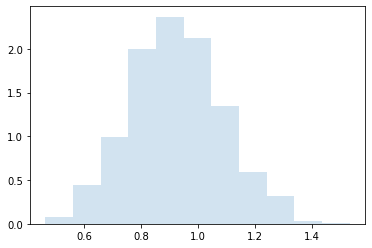

In [ ]:
#бутстраповская оценка плотности распределения среднего арифметического
boot_𝛼1 = []
for i in range(1000):
  xn_sample = np.random.choice(xn, size = n)
  boot_𝛼1.append(np.mean(xn_sample))
plt.hist(boot_α1, density=True, histtype='bar', alpha=0.2, bins='sturges') 
print("гистограмма бутстраповской оценки плотности распределения среднего арифметического")
plt.show()

сравнение плотности распределения среднего арифметического элементов выборки с ее бутстраповской оценкой


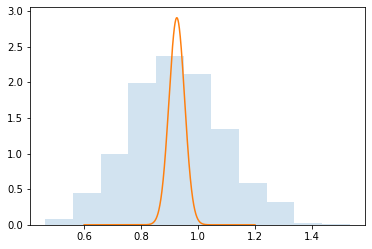

In [ ]:
#сравнение плотности распределения среднего арифметического элементов выборки с ее бутстраповской оценкой
plt.hist(boot_α1, density=True, histtype='bar', alpha=0.2, bins='sturges') 
x = np.linspace(0.6, 1.2, 1000)
plt.plot(x, 1/(5*sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2)))
print("сравнение плотности распределения среднего арифметического элементов выборки с ее бутстраповской оценкой")
plt.show()

гистограмма бутстраповской оценки плотности распределения коэффициента ассиметрии


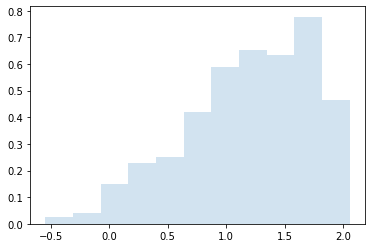

In [ ]:
#бутстраповская оценка плотности распределения коэффициента ассиметрии
np.random.randint(2, size=10)
boot_𝛾_n = []
for i in range(1000):
  xn_sample = np.random.choice(xn, size = n)
  boot_mean = np.mean(xn_sample)
  boot_𝜇2 = 0
  boot_𝜇3 = 0
  for xi in xn:
    boot_𝜇2 += ((xi - boot_mean) ** 2) / n
    boot_𝜇3 += ((xi - boot_mean) ** 3) / n
  boot_𝛾 = boot_𝜇3 / ((boot_𝜇2) ** (3/2))
  boot_𝛾_n.append(boot_𝛾)
plt.hist(boot_γ_n, density=True, histtype='bar', alpha=0.2, bins='sturges') 
print("гистограмма бутстраповской оценки плотности распределения коэффициента ассиметрии")
plt.show()